In [1]:
# passive reverts = times when bot was reverted by someone else
# active reverts = times when bot reverts someone else

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [4]:
df = pd.read_csv('revs_scored_jan.tsv', sep='\t', header=0)

In [5]:
days = df.rev_timestamp.map(lambda ts: datetime.utcfromtimestamp(ts).day)
df['day'] = days

In [6]:
df_sample = df[df.day<22]
df_bots = df_sample[df_sample.user_is_bot]

In [7]:
df_reverters = df[df.is_revert]

df_reverted = df[df.is_reverted]
df_reverted.seconds_to_revert = df_reverted.seconds_to_revert.astype('str').astype('int')
df_reverted = df_reverted[df_reverted.seconds_to_revert < 86400]
df_reverted.revert_id = df_reverted.revert_id.astype('int')

/Users/newcom3/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
# merging df_reverted and df_reverters to get dataset of all reverted edits

all_reverted_edits = pd.merge(df_reverted, df_reverters, 
             how='inner', 
             left_on='revert_id', 
             right_on='rev_id', 
             suffixes=('', '_reverter')
)

In [9]:
df_bot_active_reverts = all_reverted_edits[all_reverted_edits.user_is_bot_reverter == True]
df_bot_passive_reverts = all_reverted_edits[all_reverted_edits.user_is_bot == True]

In [10]:
df_human_active_reverts = all_reverted_edits[all_reverted_edits.user_is_bot_reverter == False]
df_human_passive_reverts = all_reverted_edits[all_reverted_edits.user_is_bot == False]

In [11]:
# current variable summary:
#   df_sample = all edits in our time frame
#   df_bots = all edits made by bots in time frame
#   df_reverters = all reverting edits in dataset (not limited to time frame)
#   df_reverted = all revisions that were reverted w/in 24 hours in time frame
#   all_reverted_edits = every edit reverted w/in 24 hours with reverted and revert edit info, within time frame
#     df_bot_active_reverts = all active reverts by bots of humans and bots in time frame
#     df_bot_passive_reverts = all revisions by bots which were reverted (by humans or bots), with reverting user info merged, in time frame
#     df_human_active_reverts
#     df_human_passive_reverts

In [31]:
top_bots_reverted_by_humans0 = df_bot_passive_reverts[df_bot_passive_reverts.user_is_bot_reverter == False]
top_bots_reverted_by_humans0 = top_bots_reverted_by_humans0[top_bots_reverted_by_humans0.page_namespace == 0]
top_bots_reverted_by_humans0 = top_bots_reverted_by_humans0.groupby("user_text", as_index = False)
top_bots_reverted_by_humans0 = top_bots_reverted_by_humans0.count().sort_values("rev_id", ascending = False)
top_bots_reverted_by_humans0 = top_bots_reverted_by_humans0.head(5)

In [40]:
top_bots_reverted_by_humans0[["user_text", "rev_id"]]

,user_text,rev_id
7,ClueBot NG,757
32,RonBot,560
0,AnomieBOT,331
27,MusikBot,63
17,Ganeshbot,58


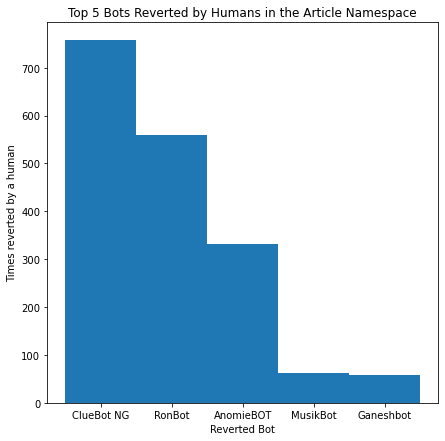

In [37]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))

y = range(len(top_bots_reverted_by_humans0))
axes.bar(y, top_bots_reverted_by_humans0.rev_id, width=1)
axes.set_title("Top 5 Bots Reverted by Humans in the Article Namespace")
axes.set_xlabel("Reverted Bot")
axes.set_ylabel("Times reverted by a human")
#axes.set_yscale('log')
axes.set_xticks(y)
axes.set_xticklabels([row.user_text for row in top_bots_reverted_by_humans0.itertuples()], rotation=0)

#fig.tight_layout()
plt.show()